In [1]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from skimage.io import imread, imshow
from skimage.transform import resize
import cv2

/home/arthur/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/home/arthur/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


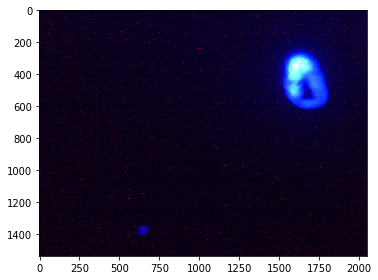

In [2]:
ori = imread('../../dataset/dataset_3/fluorescent/tr4/1/B1S1R05 030.jpg')
imshow(im)

/home/arthur/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


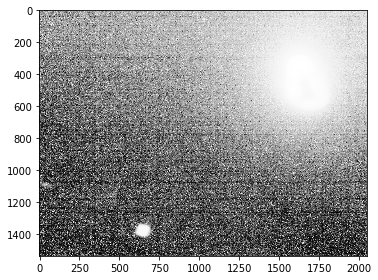

In [6]:
ori = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im = cv2.equalizeHist(ori)
imshow(im)

/home/arthur/miniconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


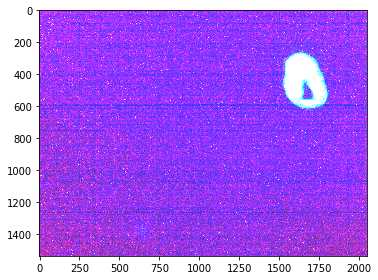

In [13]:
ori = imread('../../dataset/dataset_3/fluorescent/tr4/1/B1S1R05 030.jpg')
alpha = 10
beta = 50
im = cv2.addWeighted(ori, alpha, np.zeros(ori.shape, ori.dtype), 0, beta)
imshow(im)

In [4]:
def get_image(path):
    im = imread(path)
    #im = resize(im, 0.125)
    im = resize(im, (192, 256))
    im = np.divide(im, 255.)
    return im

In [3]:
im_clean = get_image('demo/test_images/clean/B1S1 013.jpg')
im_infected = get_image('demo/test_images/infected/r11_B1S1 017.jpg')
images = np.array([im_clean, im_infected])
print(images.shape)

/home/arthur/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(2, 192, 256, 3)


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(192, 256, 3))
classifier = load_model('/home/arthur/Documents/AI/citas/models/Inception-v3/demo/best.h5')
f = base_model.predict(images)
p = classifier.predict(f)
print(p)